In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt 

In [2]:
df = pd.read_csv('Wprld population growth rate by cities 2024.csv')
df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [4]:
df.isnull().sum() 
df.fillna("NA",inplace=True)

## Data preprocessing  
Combine City and Country into one column City_Country for clarity and reduce complexity. The City column is dropped since it’s now redundant.

In [5]:
# merged Columns of City and Country 
# dropped City and Country columns to avoid complication 
df['City_Country'] = df['City'] + ' , ' + df['Country']
df.drop(columns=['City'],inplace=True)

## Growth Rate Calculation
Calculate the percentage change in population (growth rate) from 2023 to 2024 for each city. The temporary column Growth Rate is dropped to avoid confusion.

In [6]:
# correction growth rate calculation
df['Growth Rate (%)'] = (df['Population (2024)']-df['Population (2023)'])/df['Population (2023)']* 100
df.drop(columns='Growth Rate',axis=1,inplace=True)


In [7]:
df 

,Country,Continent,Population (2024),Population (2023),City_Country,Growth Rate (%)
0,Japan,Asia,37115035,37194105,"Tokyo , Japan",-0.212587
1,India,Asia,33807403,32941309,"Delhi , India",2.629203
2,China,Asia,29867918,29210808,"Shanghai , China",2.249544
3,Bangladesh,Asia,23935652,23209616,"Dhaka , Bangladesh",3.128169
4,Brazil,South America,22806704,22619736,"Sao Paulo , Brazil",0.826570
...,...,...,...,...,...,...
796,India,Asia,751493,737128,"Bhavnagar , India",1.948780
797,United Kingdom,Europe,751303,745876,"Sheffield , United Kingdom",0.727601
798,Angola,Africa,751297,727641,"Huambo , Angola",3.251054
799,Brazil,South America,750174,742115,"Ribeirao Preto , Brazil",1.085950


## Plotting Top and Worst Cities by Population for 2023 and 2024
Visualize the top 10 and worst 10 cities by population for both 2023 and 2024. Two side-by-side bar charts are created to easily compare the top and worst cities in terms of population size.

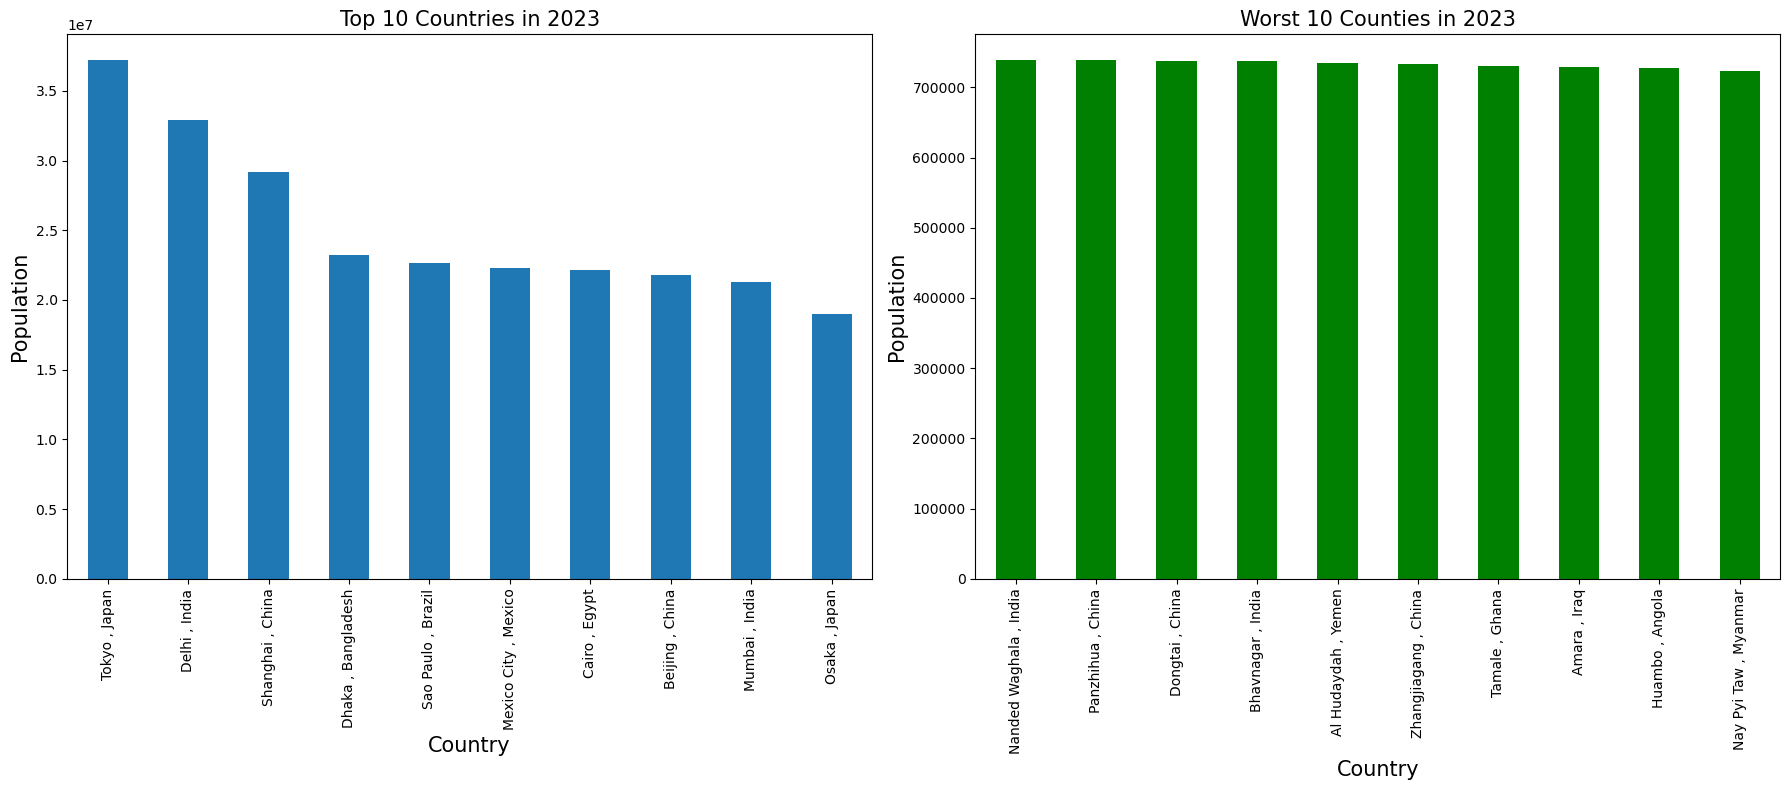

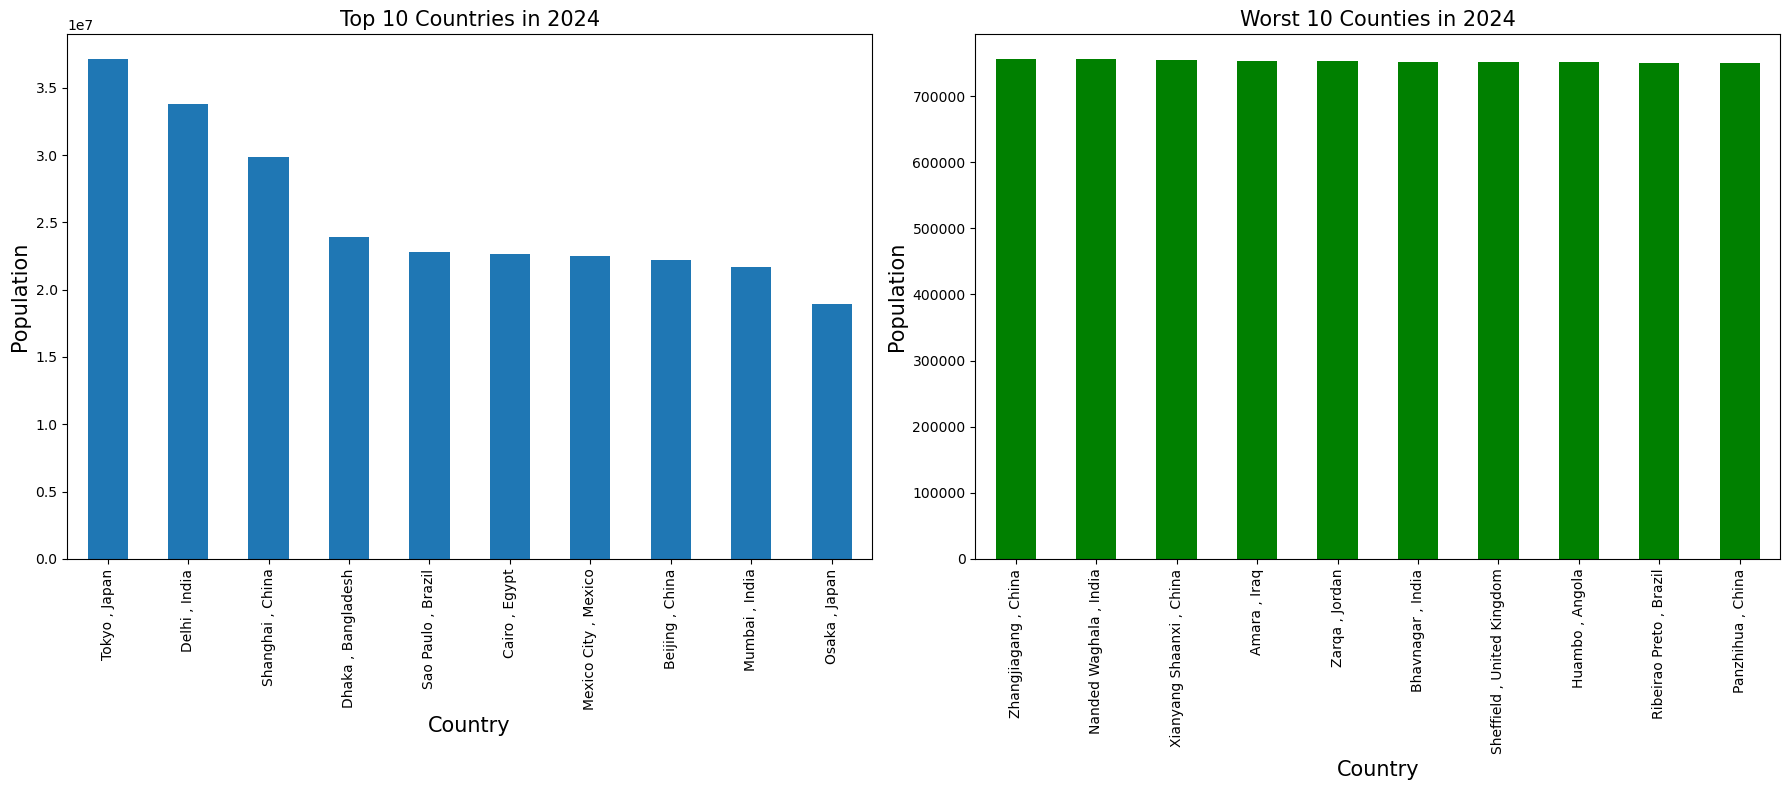

In [8]:
# poupulation in 2023 vs 2024
def plot_top_and_worst_city(df,year):
  df_grouped = df.groupby('City_Country')[f'Population ({year})'].sum().reset_index()
  df_sorted = df_grouped.sort_values(by=f'Population ({year})', ascending= False).reset_index(drop=True)
  df_sorted['Rank'] = df_sorted.index + 1 

  fig, axes = plt.subplots(1,2,figsize=(18,8))

# top 10 countries 
  df_head_2023 = df_sorted.head(10)
  ax = df_head_2023.plot(kind='bar',x='City_Country',y=f'Population ({year})', legend=False,ax=axes[0])
  axes[0].set_xlabel('Country', fontsize=15)
  axes[0].set_ylabel('Population', fontsize=15)
  axes[0].set_title(f'Top 10 Countries in {year}', fontsize=15)


      # worst 10 countries 
  df_tail_2023 = df_sorted.tail(10)
  ax = df_tail_2023.plot(kind='bar',x='City_Country',y=f'Population ({year})',color='green', legend=False,ax=axes[1])
  axes[1].set_xlabel('Country', fontsize=15)
  axes[1].set_ylabel('Population', fontsize=15)
  axes[1].set_title(f'Worst 10 Counties in {year}', fontsize=15)

  plt.tight_layout()
  plt.show()

plot_top_and_worst_city(df, 2023)
plot_top_and_worst_city(df, 2024)



 ## Visualizing Best and Worst Growth Rates for Cities
 This section plots the top 20 cities with the highest growth rates and the worst 20 cities with the lowest (or negative) growth rates. Horizontal bar charts are used to display the cities with significant changes in population growth.

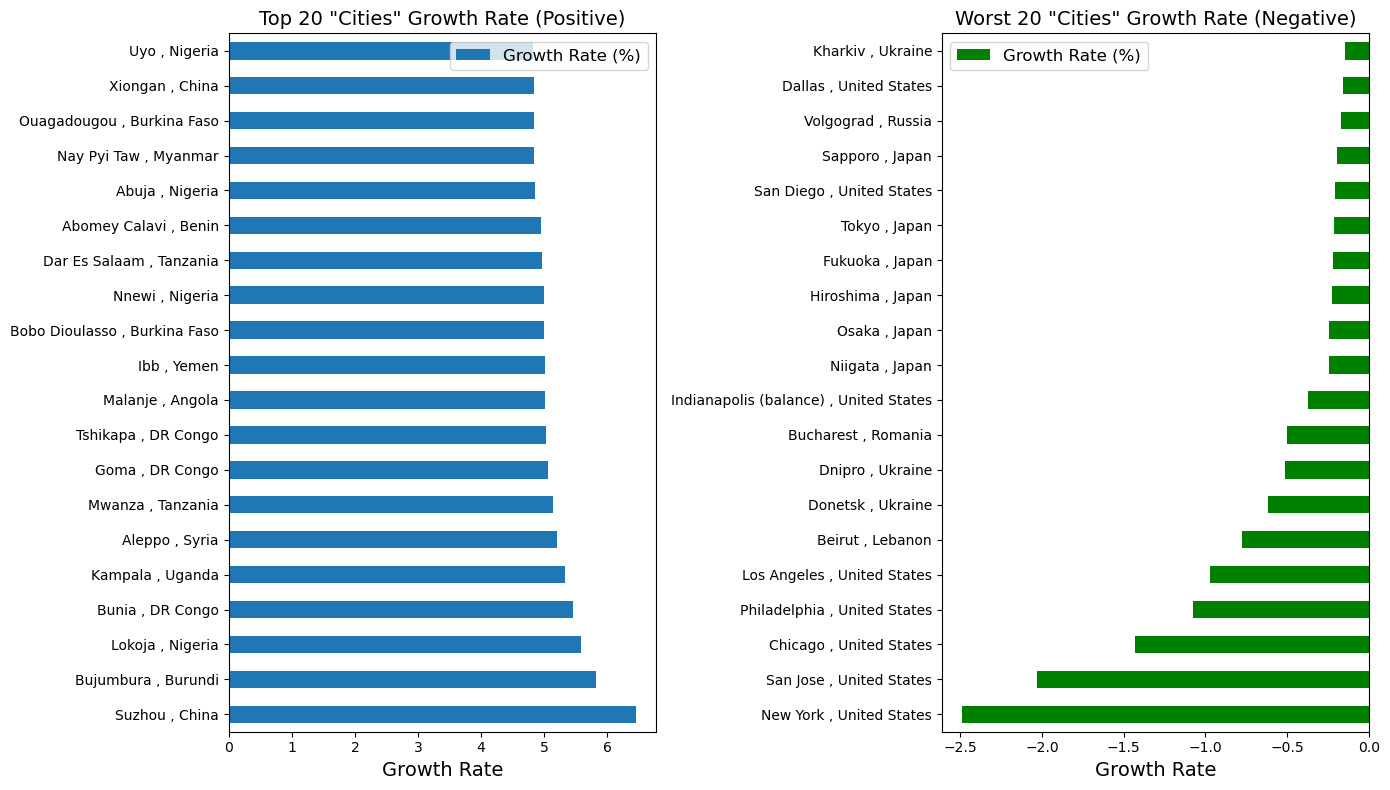

In [9]:

# Top and worst growth rate 
# Best 20
df_grouped_rate = df.groupby('City_Country')['Growth Rate (%)'].sum().reset_index()
df_sorted_rate_1 = df_grouped_rate.sort_values(by='Growth Rate (%)', ascending=False).head(20)
# Worst 20
df_sorted_rate_2 = df_grouped_rate.sort_values(by='Growth Rate (%)', ascending=True).head(20)

fig, axes = plt.subplots(1,2, figsize=(14,8))
ax = df_sorted_rate_1.plot(kind='barh',x='City_Country',y='Growth Rate (%)',ax=axes[0])
axes[0].set_title('Top 20 "Cities" Growth Rate (Positive)',fontsize=14)
axes[0].set_ylabel('')
axes[0].set_xlabel('Growth Rate',fontsize=14)
axes[0].legend(['Growth Rate (%)'], fontsize=12)

ax = df_sorted_rate_2.plot(kind='barh',x='City_Country',y='Growth Rate (%)',color ='green', ax=axes[1])
axes[1].set_title('Worst 20 "Cities" Growth Rate (Negative)', fontsize=14)
axes[1].set_ylabel('')
axes[1].set_xlabel('Growth Rate',fontsize=14)
axes[1].legend(['Growth Rate (%)'], fontsize=12)

plt.tight_layout()
plt.show()


## nalyzing Population Data by Continent and Growth Rate by Country
Analyze how many cities per continent are included in the dataset and visualize the top and worst 5 countries by population growth rate.

In [10]:
# number of entry by continent
df_sorted_continent = df['Continent'].value_counts().sort_values(ascending=False)

# estimated top 10 growth rate by country 
df_groupby_growthRate = df.groupby('Country')['Growth Rate (%)'].sum().reset_index()
df_estimated_top_growthRate = df_groupby_growthRate.sort_values(by='Growth Rate (%)', ascending=False).head(5)

# estimated worst 10 growth country 
df_estimated_tail_growthRate = df_groupby_growthRate.sort_values(by='Growth Rate (%)', ascending=False).tail(5)



## Choropleth Map of Growth Rates by Country
Create a choropleth map to visualize the population growth rate of countries across the world. Darker shades represent higher growth rates. This interactive map allows users to hover over countries and see their growth rates.


In [11]:
import plotly.express as px
import numpy as np

fig = px.choropleth(df_groupby_growthRate,
                    locations ='Country',
                    locationmode ='country names',
                    color ='Growth Rate (%)',
                    hover_name ='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    range_color =(0,np.percentile(df_groupby_growthRate['Growth Rate (%)'], 95)))

fig.update_layout(title_text = 'Population Growth Rate by Country')
fig.show()

## Pie Chart and Bar Charts for Top and Worst Countries by Growth Rate

This section creates:
A pie chart showing the distribution of cities by continent.
Bar charts displaying the top 5 and worst 5 countries by population growth rate. The worst countries' chart is oriented horizontally and color-coded in green.


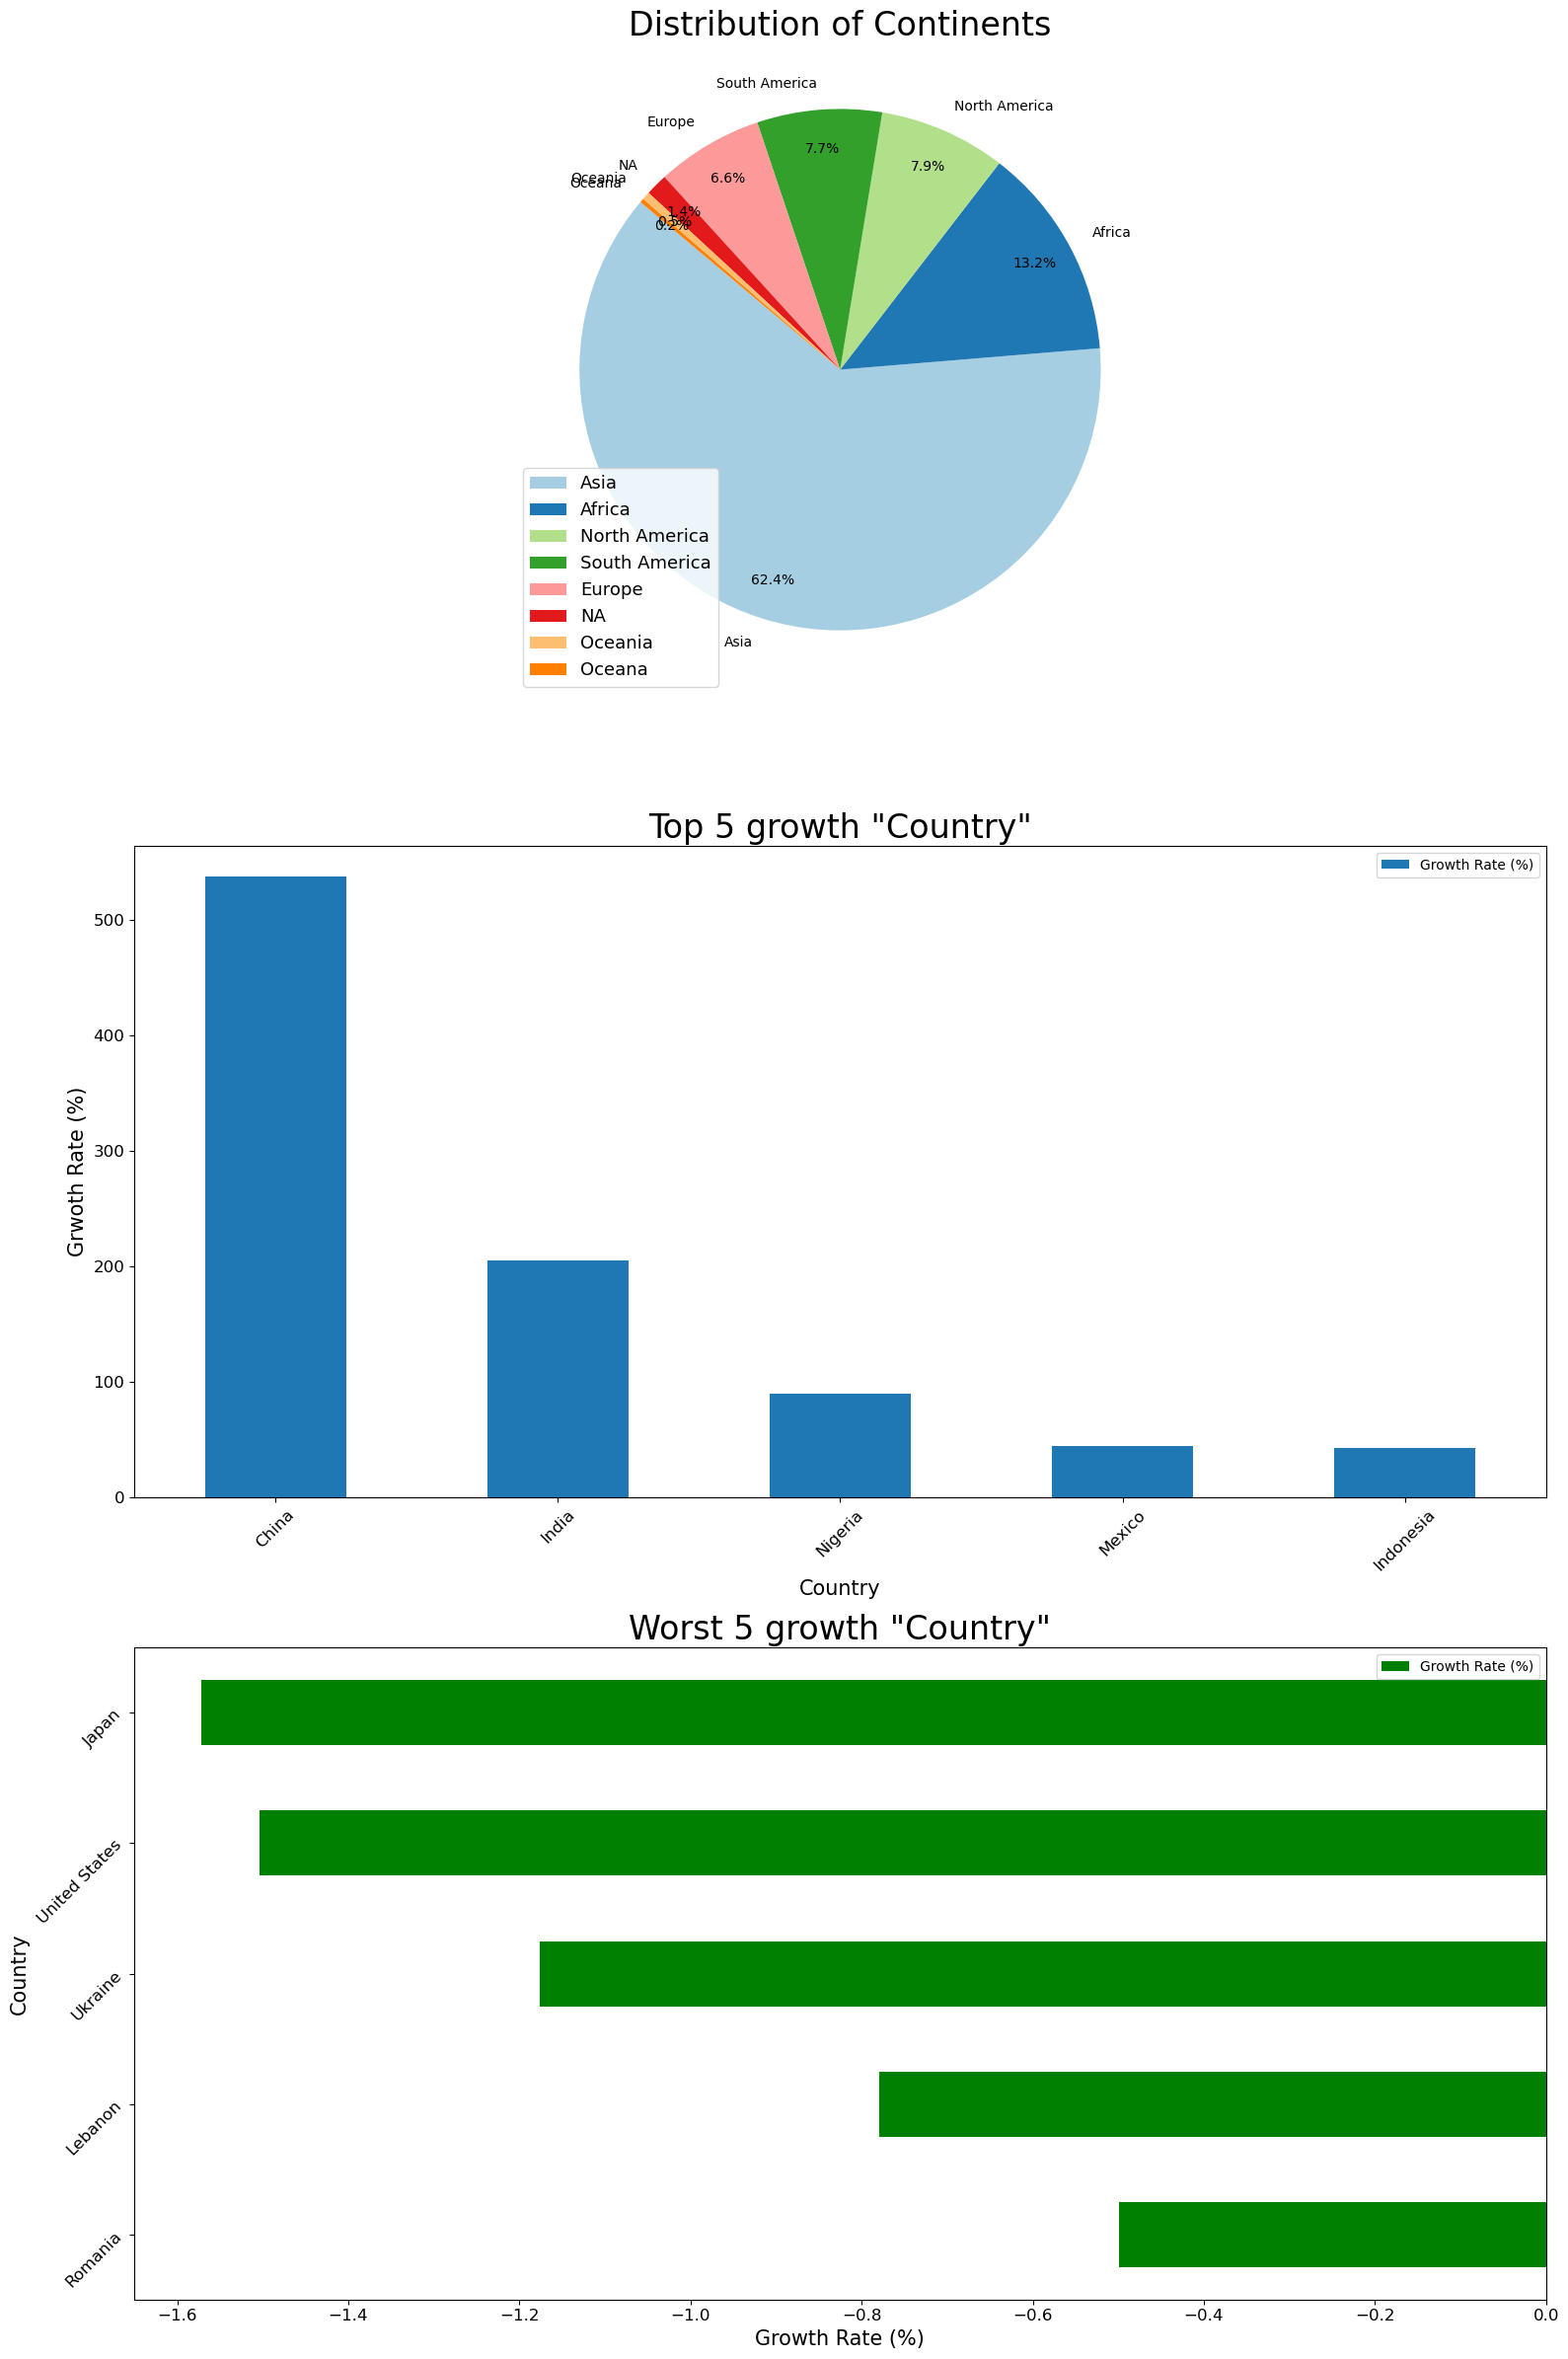

In [12]:
# start creating pie charts for continents 
fig,axes = plt.subplots(3,1,figsize=(16,24))
ax = df_sorted_continent.plot(kind='pie',
                              ax=axes[0],
                              startangle=140,
                              autopct='%1.1f%%',  
                              pctdistance=0.85,  
                              colors=plt.cm.Paired.colors,
                              legend=False
                              )
axes[0].set_ylabel('')
axes[0].legend(df_sorted_continent.index, fontsize=13,loc='lower left')
axes[0].set_title('Distribution of Continents',fontsize=24)

df_estimated_top_growthRate.plot(kind='bar',
                                 x='Country',
                                 y='Growth Rate (%)',
                                 legend=True,
                                 ax=axes[1]
                                )
axes[1].set_title('Top 5 growth "Country"',fontsize=24)
axes[1].set_xlabel('Country',fontsize=15)
axes[1].set_ylabel('Grwoth Rate (%)',fontsize=15)
axes[1].tick_params(axis='x',rotation=45, labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

df_estimated_tail_growthRate.plot(kind='barh',
                                  x='Country',
                                  y='Growth Rate (%)',
                                  color='green',
                                 legend=True,
                                 ax=axes[2],
                                )
axes[2].set_title('Worst 5 growth "Country"',fontsize=24)
axes[2].set_xlabel('Growth Rate (%)',fontsize=15)
axes[2].set_ylabel('Country',fontsize=15)
axes[2].tick_params(axis='y',rotation=45,labelsize=12)
axes[2].tick_params(axis='x',labelsize=12)
plt.tight_layout()

plt.show()



## Calculating Population Difference for Specific Countries
This function calculates the population difference from 2023 to 2024 for the top 5 and worst 5 countries based on growth rate. The results are printed, showing which countries gained or lost the most population in absolute terms.

In [13]:
# Population differences from 2023 to 2024 in the five countries with the worst growth rates
def calculate_population_difference(df,country):
    country_df  = df[df['Country'] == country]
    return country_df['Population (2024)'].sum() - country_df['Population (2023)'].sum()

worst5_countries = ['Japan','United States','Ukraine','Lebanon','Romania']
top5_countries = ['China','India','Nigeria','Mexico','Indonesia']


print('Worst 5 Countries by Population Decline (2024 vs 2023)\n')
for country in worst5_countries:
    population_diff = calculate_population_difference(df,country)
    print(f"Population Difference of {country} : {population_diff}")

print('\nTop 5 Countries by Population Growth (2024 vs 2023)\n')
for country in top5_countries:
    population_diff = calculate_population_difference(df,country)
    print(f"Population Difference of {country} : {population_diff}")

Worst 5 Countries by Population Decline (2024 vs 2023)

Population Difference of Japan : -164211
Population Difference of United States : -239209
Population Difference of Ukraine : -9082
Population Difference of Lebanon : -18869
Population Difference of Romania : -8865

Top 5 Countries by Population Growth (2024 vs 2023)

Population Difference of China : 12089116
Population Difference of India : 6286162
Population Difference of Nigeria : 1963480
Population Difference of Mexico : 925752
Population Difference of Indonesia : 945986


## Conclusion
This entire workflow helps visualize and analyze world population growth trends by city and country for 2023 and 2024, focusing on top and worst performers in terms of population and growth rates. The combination of bar charts, pie charts, and a choropleth map provides a comprehensive understanding of how